In [1]:
import pandas as pd

# Load cmd_commands.csv
cmd_commands = pd.read_csv('/kaggle/input/linuxcmdmacos-commands/cmd_commands.csv')

# Display the number of entries
num_entries_cmd = len(cmd_commands)
print(f"The number of entries in cmd_commands.csv is: {num_entries_cmd}")


The number of entries in cmd_commands.csv is: 265


In [2]:
# Load linux_commands.csv
linux_commands = pd.read_csv('/kaggle/input/linuxcmdmacos-commands/linux_commands.csv')

# Display the number of unique command names
unique_cmd_names_linux = linux_commands['name'].nunique()
print(f"The number of unique command names in linux_commands.csv is: {unique_cmd_names_linux}")


The number of unique command names in linux_commands.csv is: 269


In [3]:
from collections import Counter
import re

# Load macos_commands.csv
macos_commands = pd.read_csv('/kaggle/input/linuxcmdmacos-commands/macos_commands.csv')

# Combine all descriptions into a single string
all_descriptions_macos = ' '.join(macos_commands['description'].dropna())

# Tokenize the words and count their occurrences
words_count_macos = Counter(re.findall(r'\b\w+\b', all_descriptions_macos.lower()))

# Display the top 5 most common words
top5_words_macos = words_count_macos.most_common(5)
print(f"The top 5 most common words in macos_commands.csv descriptions are: {top5_words_macos}")


The top 5 most common words in macos_commands.csv descriptions are: [('a', 85), ('file', 40), ('the', 40), ('and', 40), ('files', 39)]


In [4]:
# Load vbscript_commands.csv
vbscript_commands = pd.read_csv('/kaggle/input/linuxcmdmacos-commands/vbscript_commands.csv')

# Calculate the length of each description and then find the average
average_description_length_vbscript = vbscript_commands['description'].apply(len).mean()
print(f"The average length of command descriptions in vbscript_commands.csv is: {average_description_length_vbscript:.2f} characters")


The average length of command descriptions in vbscript_commands.csv is: 32.57 characters


**How many unique command names are common between the linux_commands.csv and macos_commands.csv datasets?**

In [5]:
# Find the common unique command names
common_cmd_names = pd.merge(linux_commands, macos_commands, on='name')['name'].nunique()

print(f"The number of unique command names common between linux_commands.csv and macos_commands.csv is: {common_cmd_names}")


The number of unique command names common between linux_commands.csv and macos_commands.csv is: 188


**What is the distribution of command name lengths in the cmd_commands.csv dataset?**

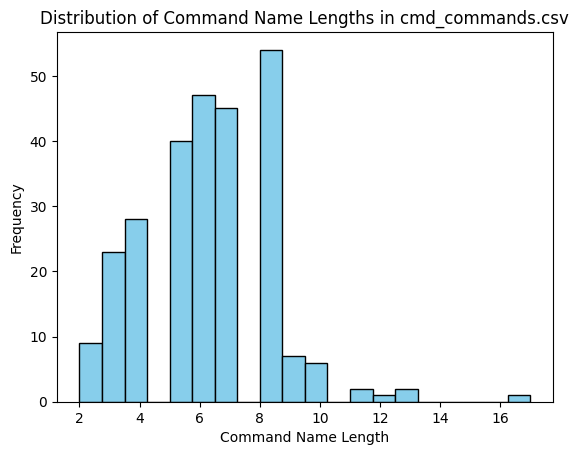

In [6]:
import matplotlib.pyplot as plt
# Calculate the length of each command name
cmd_name_lengths = cmd_commands['name'].apply(len)

# Plot the distribution of command name lengths
plt.hist(cmd_name_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Command Name Lengths in cmd_commands.csv')
plt.xlabel('Command Name Length')
plt.ylabel('Frequency')
plt.show()


**What is the most frequent word used in the descriptions of commands in the vbscript_commands.csv dataset?**

In [7]:
from collections import Counter
import re

# Combine all descriptions into a single string
all_descriptions_vbscript = ' '.join(vbscript_commands['description'].dropna())

# Tokenize the words and count their occurrences
words_count_vbscript = Counter(re.findall(r'\b\w+\b', all_descriptions_vbscript.lower()))

# Find the most frequent word
most_frequent_word_vbscript = words_count_vbscript.most_common(1)[0][0]

print(f"The most frequent word in vbscript_commands.csv descriptions is: {most_frequent_word_vbscript}")


The most frequent word in vbscript_commands.csv descriptions is: a


**How many commands in the macos_commands.csv dataset have descriptions containing the word "file"?**

In [8]:
# Count commands with descriptions containing the word "file" in macos_commands.csv
commands_with_file_macos = macos_commands['description'].str.contains(r'\bfile\b', case=False).sum()

print(f"The number of commands in macos_commands.csv with descriptions containing the word 'file' is: {commands_with_file_macos}")


The number of commands in macos_commands.csv with descriptions containing the word 'file' is: 39


**Can you visualize the distribution of command name lengths in the vbscript_commands.csv dataset?**

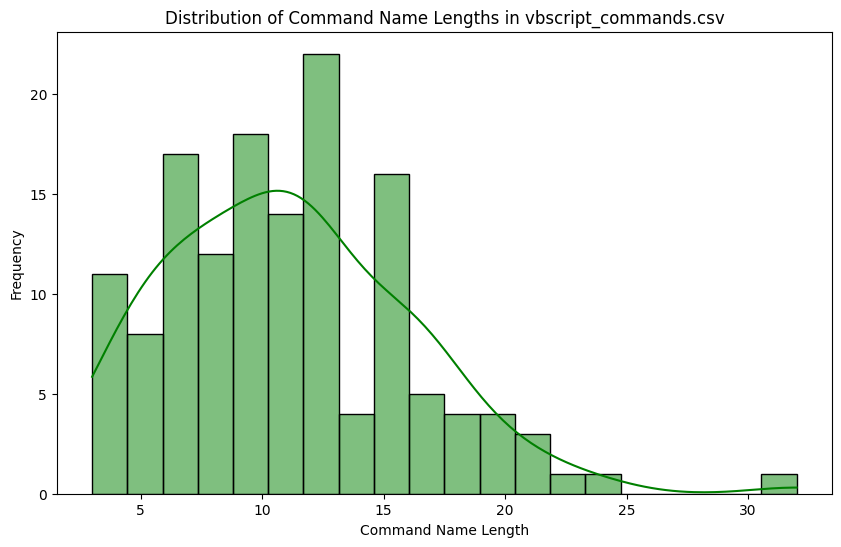

In [9]:
import seaborn as sns

# Calculate the length of each command name in vbscript_commands.csv
vbscript_cmd_name_lengths = vbscript_commands['name'].apply(len)

# Plot the distribution of command name lengths using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(vbscript_cmd_name_lengths, bins=20, color='green', kde=True)
plt.title('Distribution of Command Name Lengths in vbscript_commands.csv')
plt.xlabel('Command Name Length')
plt.ylabel('Frequency')
plt.show()


**Can you create a word cloud for the descriptions of commands in the linux_commands.csv dataset?**

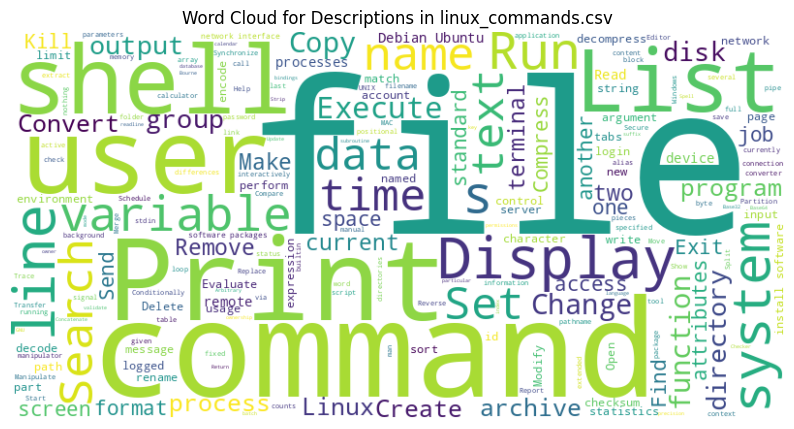

In [10]:
from wordcloud import WordCloud

# Combine all descriptions into a single string
all_descriptions_linux = ' '.join(linux_commands['description'].dropna())

# Generate a word cloud
wordcloud_linux = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions_linux)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_linux, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions in linux_commands.csv')
plt.show()


**Can you create a bar chart showing the top 10 most common words in the descriptions of commands in the cmd_commands.csv dataset?**

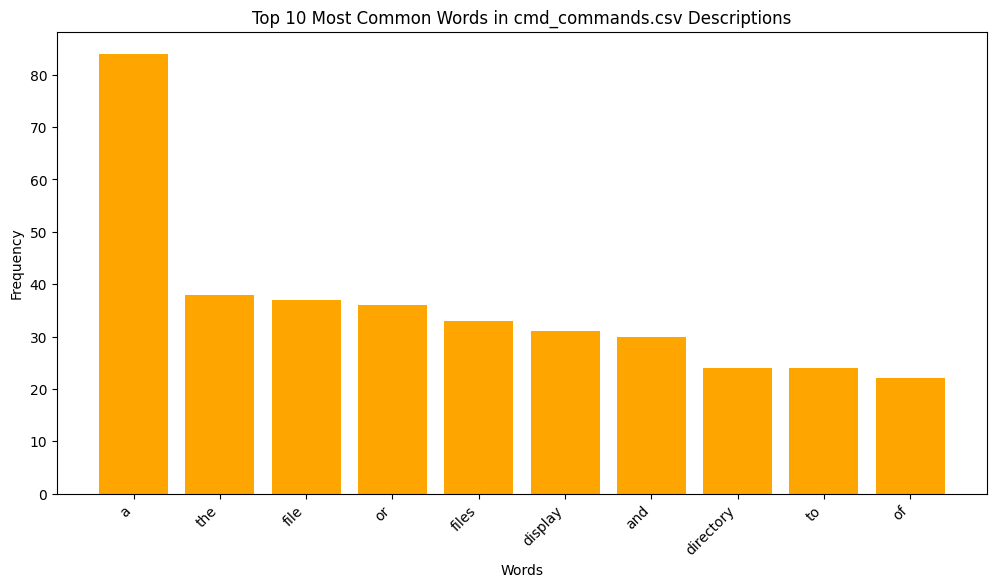

In [11]:
# Combine all descriptions into a single string
all_descriptions_cmd = ' '.join(cmd_commands['description'].dropna())

# Tokenize the words and count their occurrences
words_count_cmd = Counter(re.findall(r'\b\w+\b', all_descriptions_cmd.lower()))

# Get the top 10 most common words
top10_words_cmd = dict(words_count_cmd.most_common(10))

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top10_words_cmd.keys(), top10_words_cmd.values(), color='orange')
plt.title('Top 10 Most Common Words in cmd_commands.csv Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


**Can you create a pie chart showing the distribution of unique command names in the macos_commands.csv dataset?**

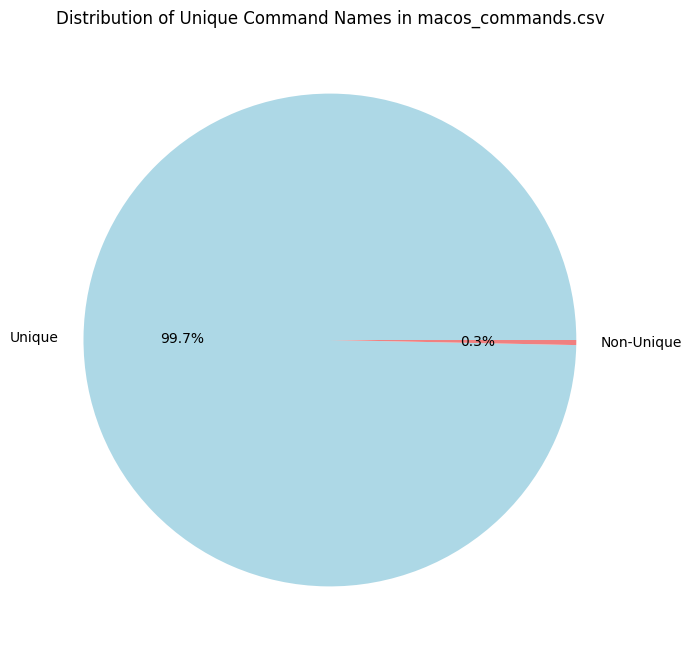

In [12]:
# Count the number of unique command names
unique_cmd_names_macos = macos_commands['name'].nunique()

# Count the number of non-unique command names
non_unique_cmd_names_macos = len(macos_commands) - unique_cmd_names_macos

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie([unique_cmd_names_macos, non_unique_cmd_names_macos], labels=['Unique', 'Non-Unique'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Unique Command Names in macos_commands.csv')
plt.show()


**Can you create a horizontal bar chart displaying the top 5 most frequent words in the descriptions of commands in the vbscript_commands.csv dataset?**

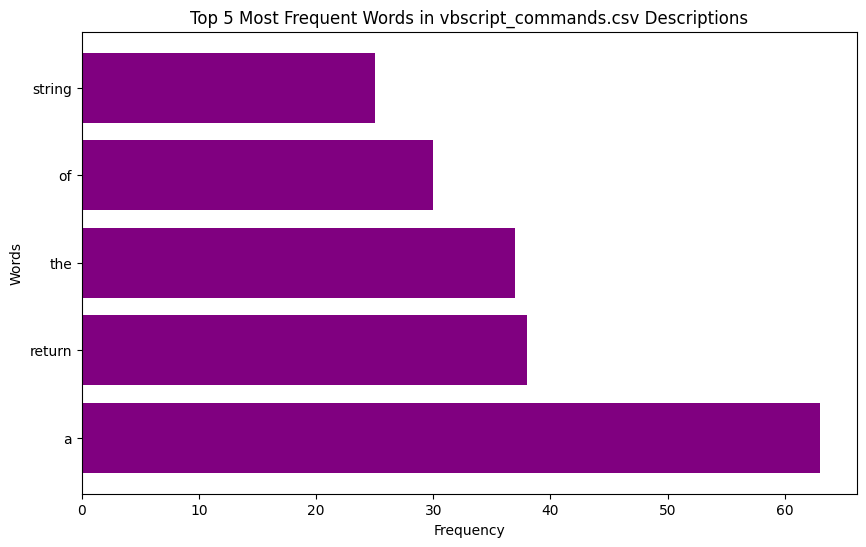

In [13]:
# Tokenize the words and count their occurrences in vbscript_commands.csv
words_count_vbscript = Counter(re.findall(r'\b\w+\b', all_descriptions_vbscript.lower()))

# Get the top 5 most common words
top5_words_vbscript = dict(words_count_vbscript.most_common(5))

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(list(top5_words_vbscript.keys()), list(top5_words_vbscript.values()), color='purple')
plt.title('Top 5 Most Frequent Words in vbscript_commands.csv Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


**Can you create a boxplot to visualize the distribution of command name lengths in the linux_commands.csv dataset?**

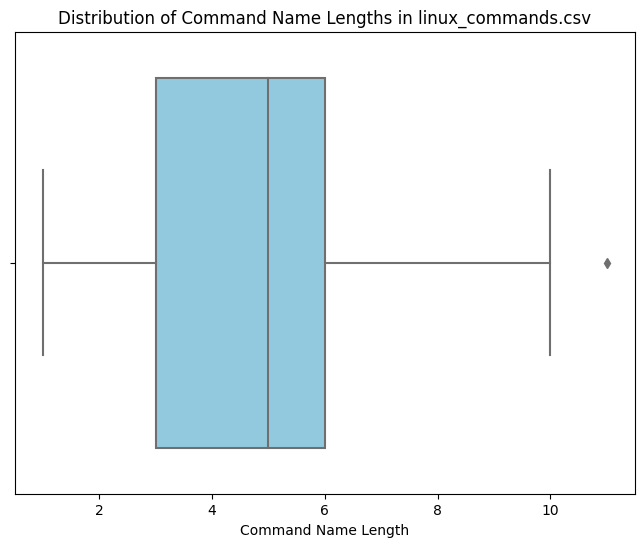

In [14]:
# Plot a boxplot for command name lengths in linux_commands.csv
plt.figure(figsize=(8, 6))
sns.boxplot(x=linux_commands['name'].apply(len), color='skyblue')
plt.title('Distribution of Command Name Lengths in linux_commands.csv')
plt.xlabel('Command Name Length')
plt.show()


**Can you create a scatter plot to show the relationship between the length of command names and descriptions in the cmd_commands.csv dataset?**

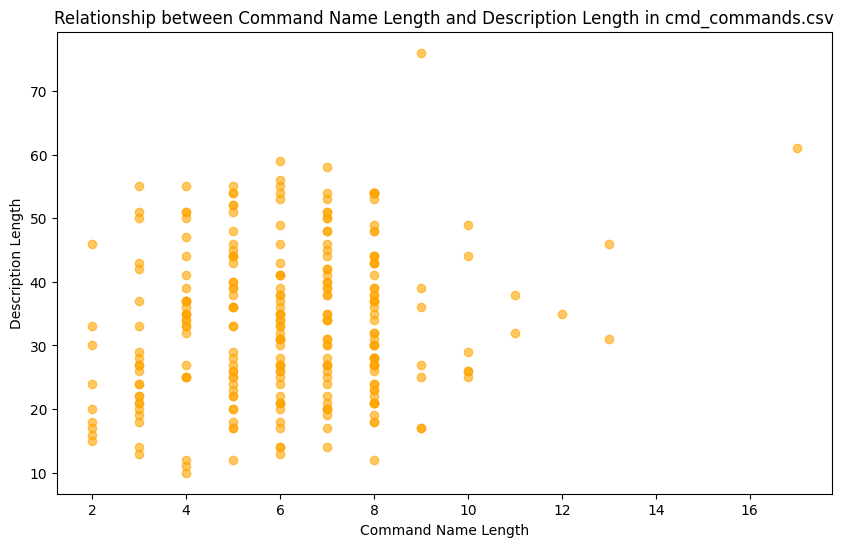

In [15]:
# Calculate the length of command names and descriptions in cmd_commands.csv
cmd_name_lengths = cmd_commands['name'].apply(len)
cmd_description_lengths = cmd_commands['description'].apply(len)

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cmd_name_lengths, cmd_description_lengths, color='orange', alpha=0.6)
plt.title('Relationship between Command Name Length and Description Length in cmd_commands.csv')
plt.xlabel('Command Name Length')
plt.ylabel('Description Length')
plt.show()


**Can you create a bar chart to visualize the number of commands in each dataset?**

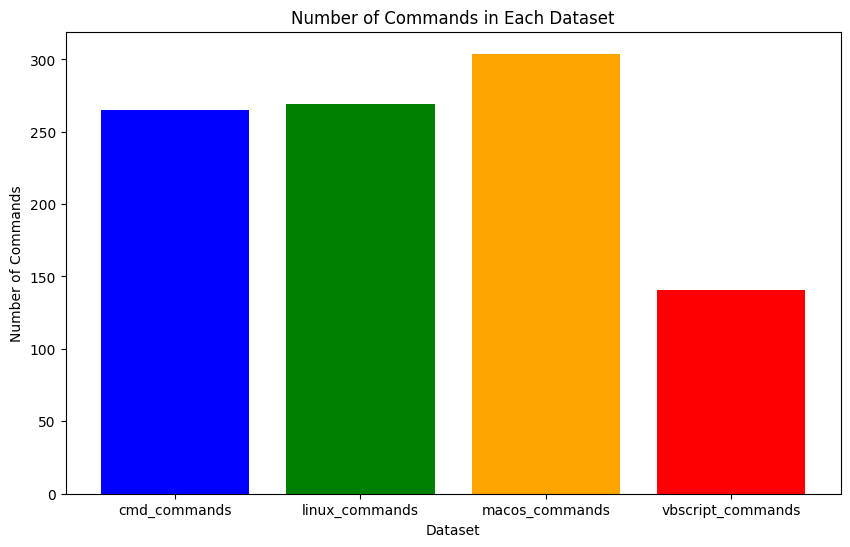

In [16]:
# Count the number of commands in each dataset
num_commands = [len(cmd_commands), len(linux_commands), len(macos_commands), len(vbscript_commands)]
dataset_names = ['cmd_commands', 'linux_commands', 'macos_commands', 'vbscript_commands']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(dataset_names, num_commands, color=['blue', 'green', 'orange', 'red'])
plt.title('Number of Commands in Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Number of Commands')
plt.show()


**Can you create a stacked bar chart to visualize the distribution of command names starting with vowels and consonants in the linux_commands.csv dataset?**

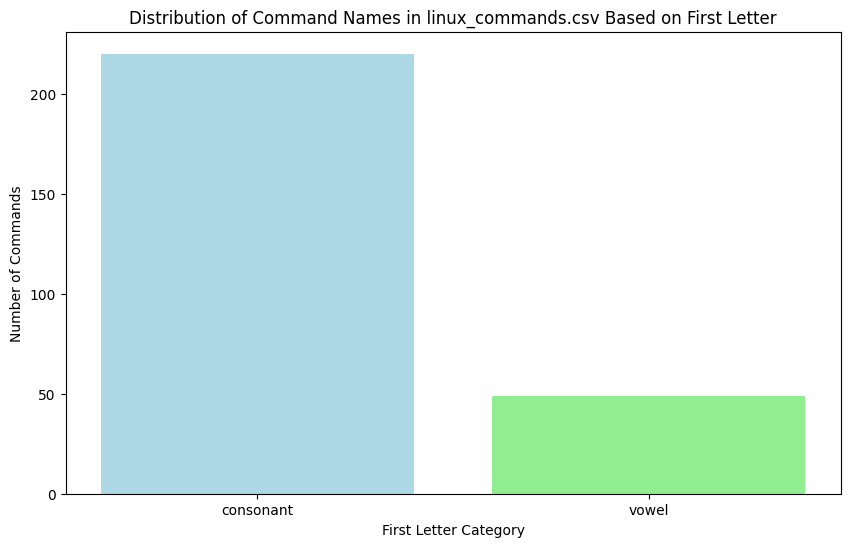

In [17]:
# Categorize command names into vowels and consonants
linux_commands['name_category'] = linux_commands['name'].apply(lambda x: 'vowel' if x[0].lower() in 'aeiou' else 'consonant')

# Count the number of commands in each category
category_counts = linux_commands['name_category'].value_counts()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color=['lightblue', 'lightgreen'])
plt.title('Distribution of Command Names in linux_commands.csv Based on First Letter')
plt.xlabel('First Letter Category')
plt.ylabel('Number of Commands')
plt.show()


**Can you create a violin plot to visualize the distribution of command description lengths in the macos_commands.csv dataset?**

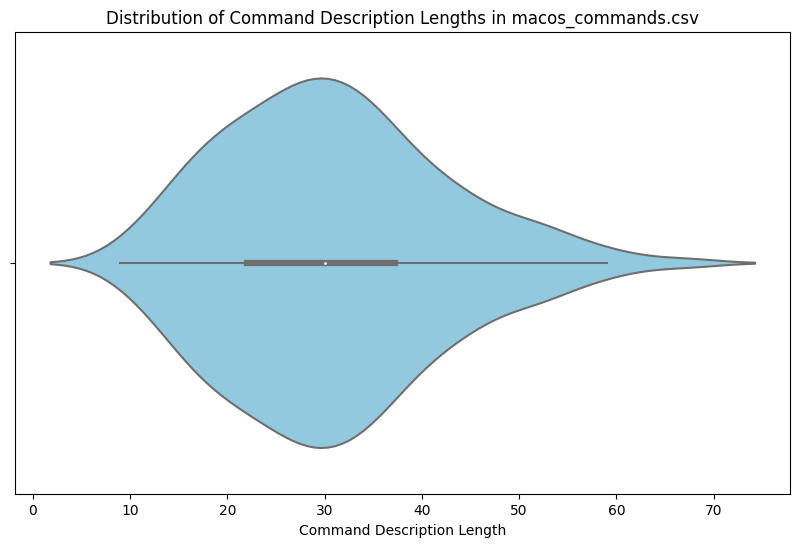

In [18]:
# Calculate the length of command descriptions in macos_commands.csv
macos_cmd_description_lengths = macos_commands['description'].apply(len)

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=macos_cmd_description_lengths, color='skyblue')
plt.title('Distribution of Command Description Lengths in macos_commands.csv')
plt.xlabel('Command Description Length')
plt.show()


**Calculate command name lengths, description lengths, and the number of unique command names in cmd_commands.csv**

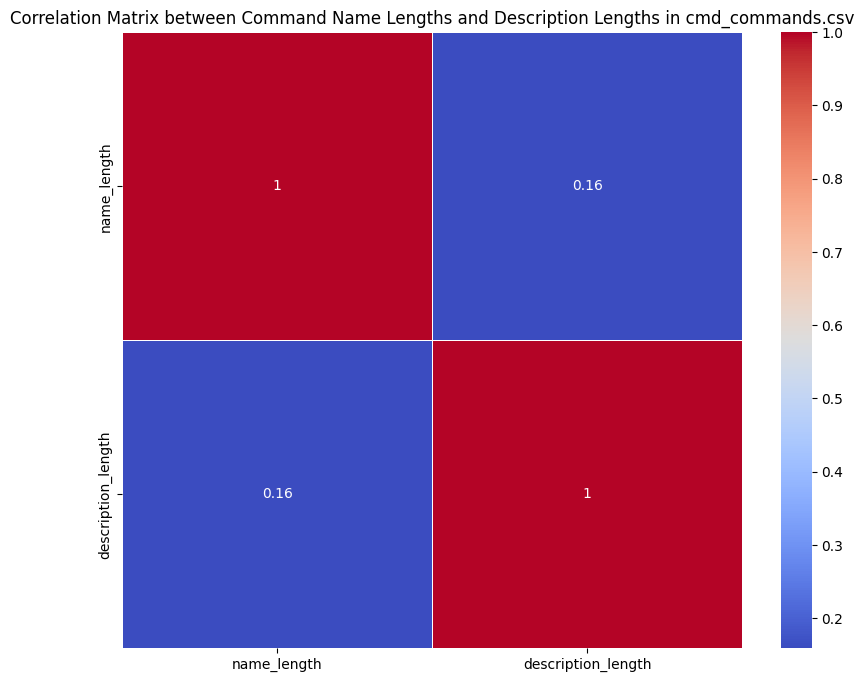

In [19]:
# Calculate command name lengths, description lengths, and the number of unique command names in cmd_commands.csv
cmd_commands['name_length'] = cmd_commands['name'].apply(len)
cmd_commands['description_length'] = cmd_commands['description'].apply(len)

# One-hot encode the 'name' column
cmd_commands_encoded = pd.get_dummies(cmd_commands, columns=['name'], drop_first=True)

# Select relevant columns for the correlation matrix
correlation_data = cmd_commands_encoded[['name_length', 'description_length']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix between Command Name Lengths and Description Lengths in cmd_commands.csv')
plt.show()


**Can you use a pie chart to visualize the distribution of unique command names starting with vowels and consonants in the linux_commands.csv dataset?**

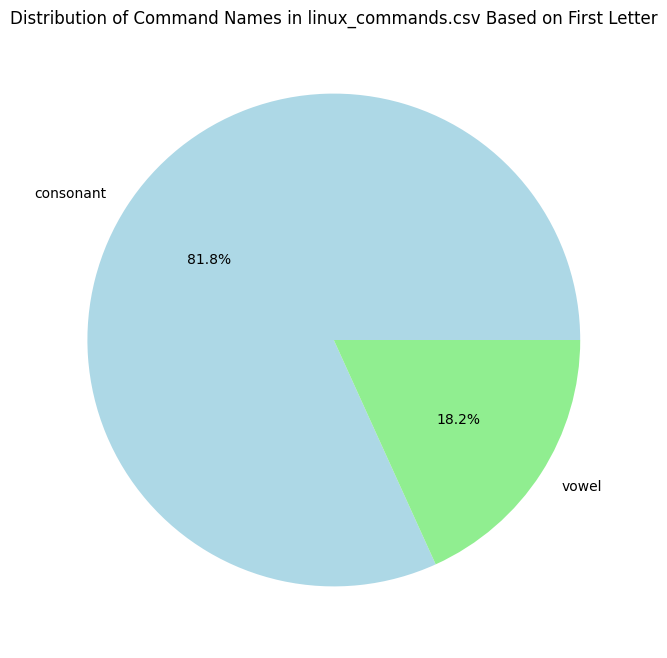

In [20]:
# Categorize command names into vowels and consonants in linux_commands.csv
linux_commands['name_category'] = linux_commands['name'].apply(lambda x: 'vowel' if x[0].lower() in 'aeiou' else 'consonant')

# Count the number of commands in each category
category_counts_linux = linux_commands['name_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts_linux, labels=category_counts_linux.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Command Names in linux_commands.csv Based on First Letter')
plt.show()


**Can you create a bar chart to display the distribution of command name lengths in the vbscript_commands.csv dataset?**

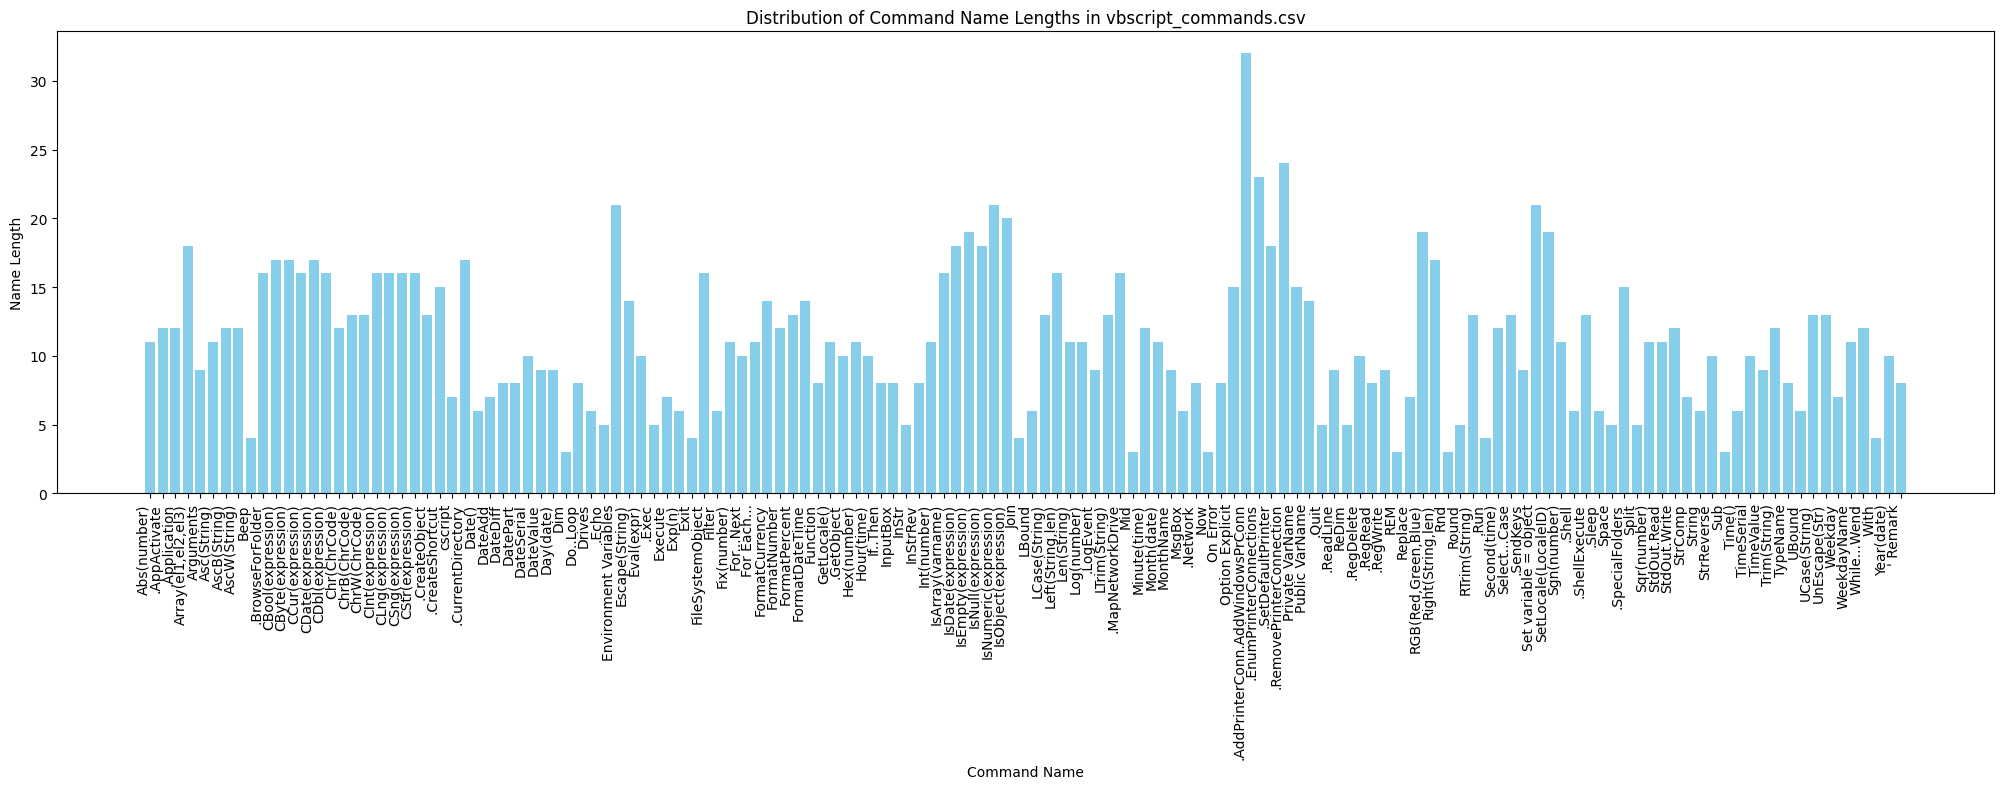

In [21]:
# Plot a bar chart for command name lengths in vbscript_commands.csv
plt.figure(figsize=(25, 6))
plt.bar(vbscript_commands['name'], vbscript_commands['name'].apply(len), color='skyblue')
plt.title('Distribution of Command Name Lengths in vbscript_commands.csv')
plt.xlabel('Command Name')
plt.ylabel('Name Length')
plt.xticks(rotation=90, ha='right')
plt.show()


**Categorize command descriptions into vowels and consonants in linux_commands.csv**

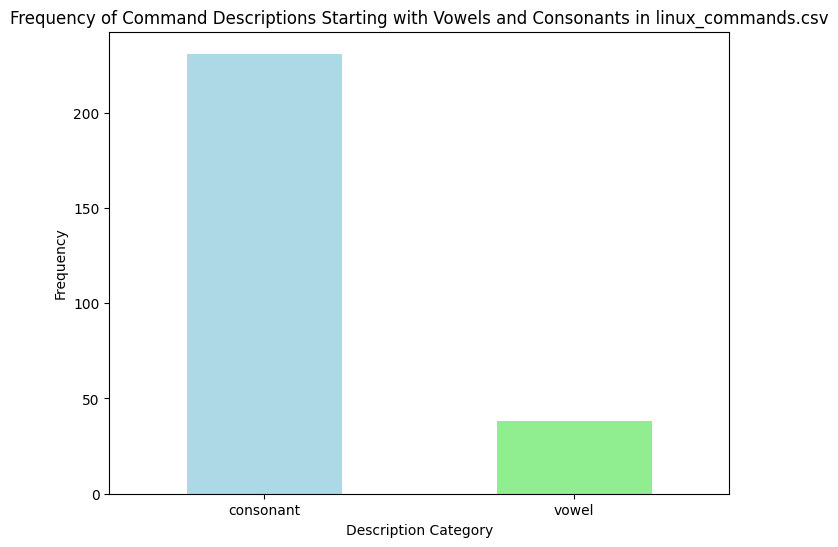

In [22]:
# Categorize command descriptions into vowels and consonants in linux_commands.csv
linux_commands['desc_category'] = linux_commands['description'].apply(lambda x: 'vowel' if x[0].lower() in 'aeiou' else 'consonant')

# Count the number of commands in each category
category_counts_linux = linux_commands.groupby('desc_category').size()

# Plot the grouped bar chart
plt.figure(figsize=(8, 6))
category_counts_linux.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Frequency of Command Descriptions Starting with Vowels and Consonants in linux_commands.csv')
plt.xlabel('Description Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


**Can you visualize the distribution of command name lengths in the macos_commands.csv dataset with a horizontal bar chart?**

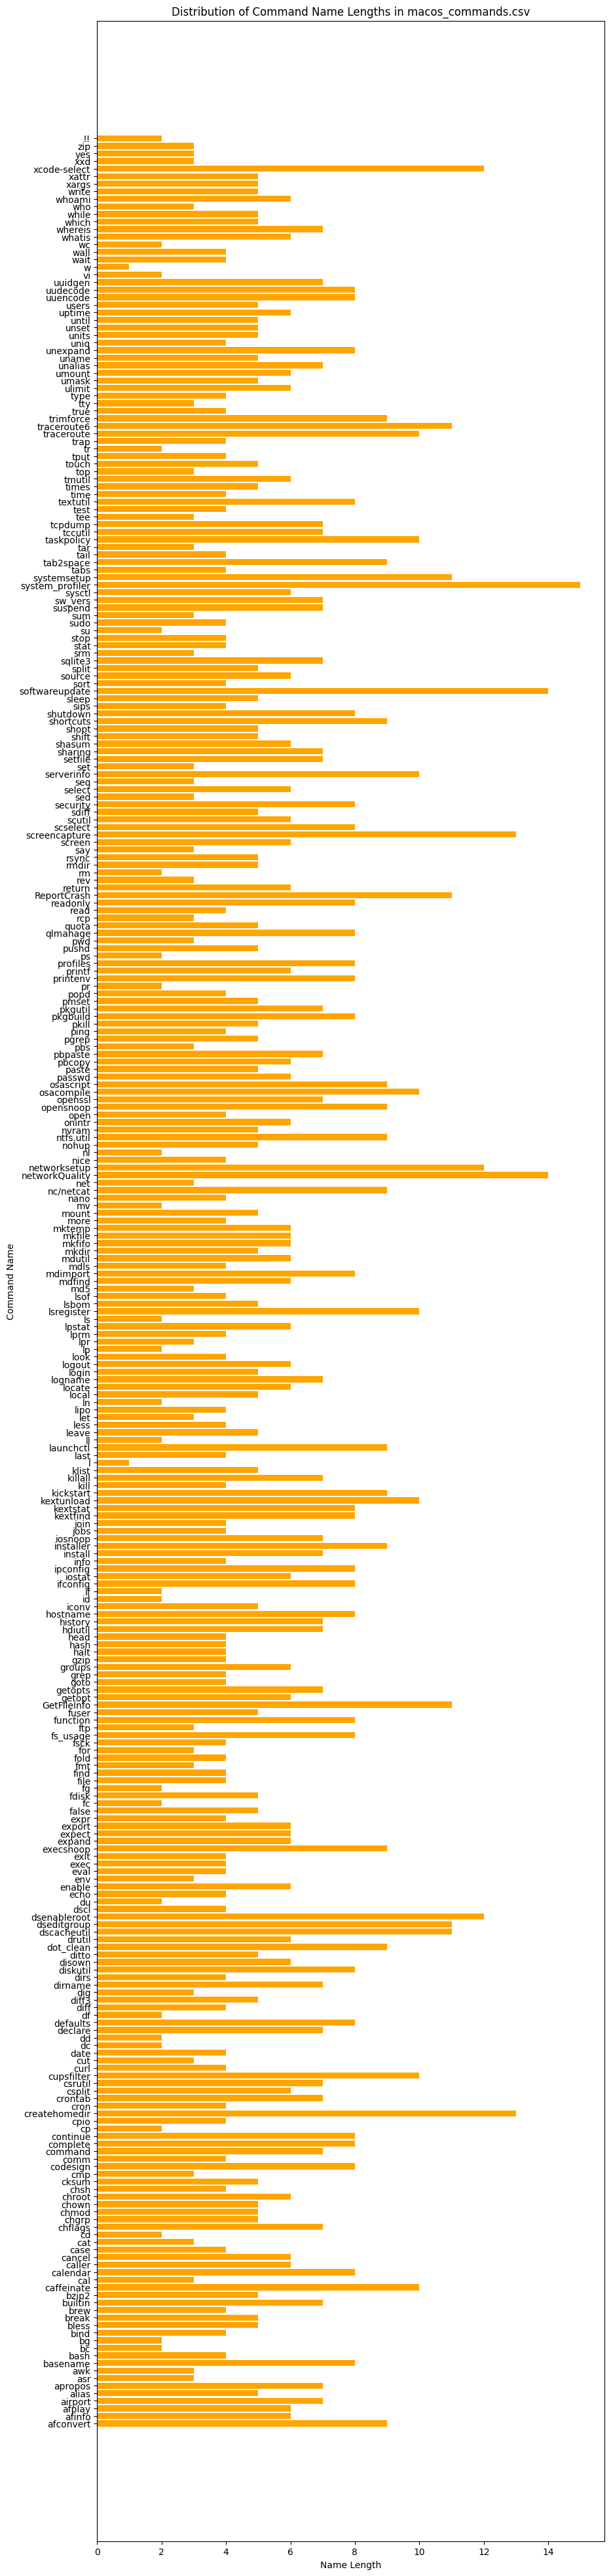

In [23]:
# Plot a horizontal bar chart for command name lengths in macos_commands.csv
plt.figure(figsize=(10, 50))
plt.barh(macos_commands['name'], macos_commands['name'].apply(len), color='orange')
plt.title('Distribution of Command Name Lengths in macos_commands.csv')
plt.xlabel('Name Length')
plt.ylabel('Command Name')
plt.show()


**Can you use a bar chart to visualize the distribution of command description lengths in the linux_commands.csv dataset?**

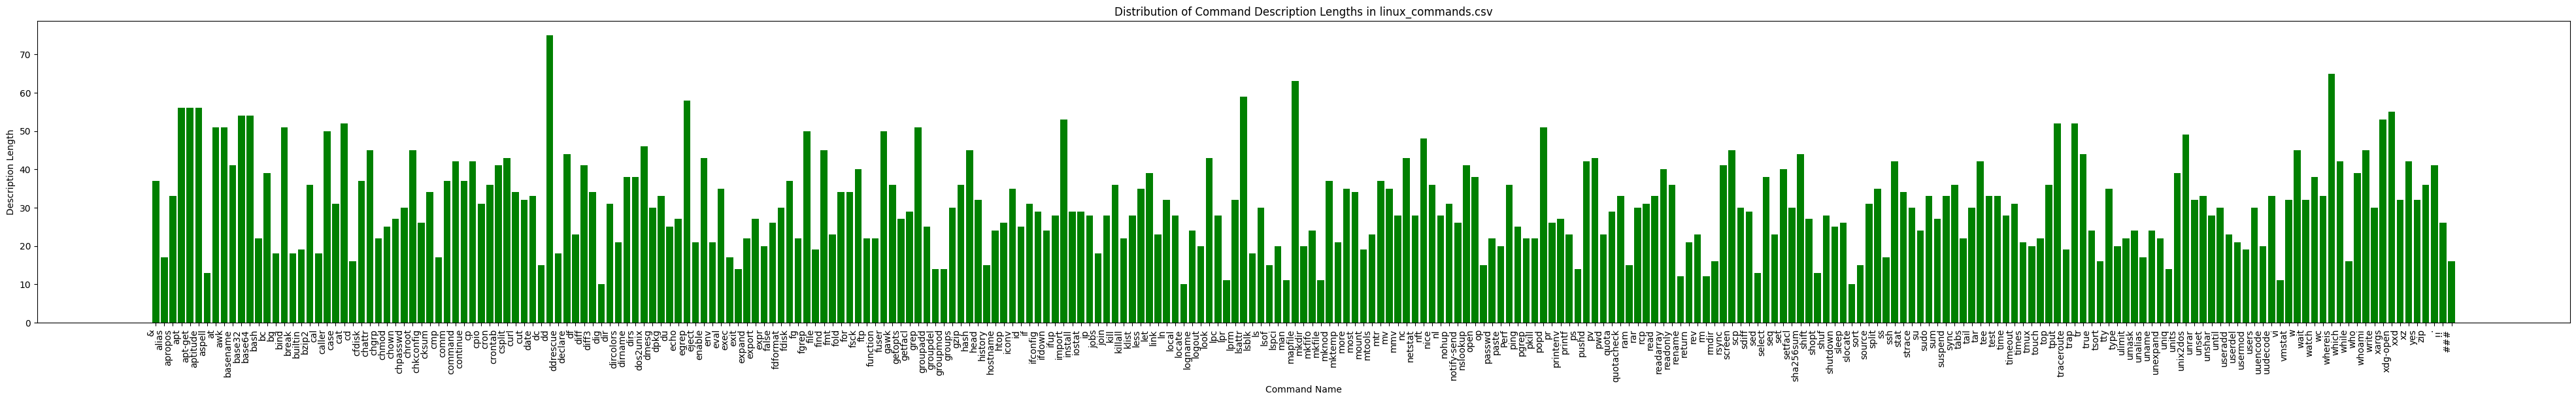

In [24]:
# Plot a bar chart for command description lengths in linux_commands.csv
plt.figure(figsize=(50, 6))
plt.bar(linux_commands['name'], linux_commands['description'].apply(len), color='green')
plt.title('Distribution of Command Description Lengths in linux_commands.csv')
plt.xlabel('Command Name')
plt.ylabel('Description Length')
plt.xticks(rotation=90, ha='right')
plt.show()


**Can you use a grouped bar chart to compare the average lengths of command names and descriptions in the cmd_commands.csv dataset?**

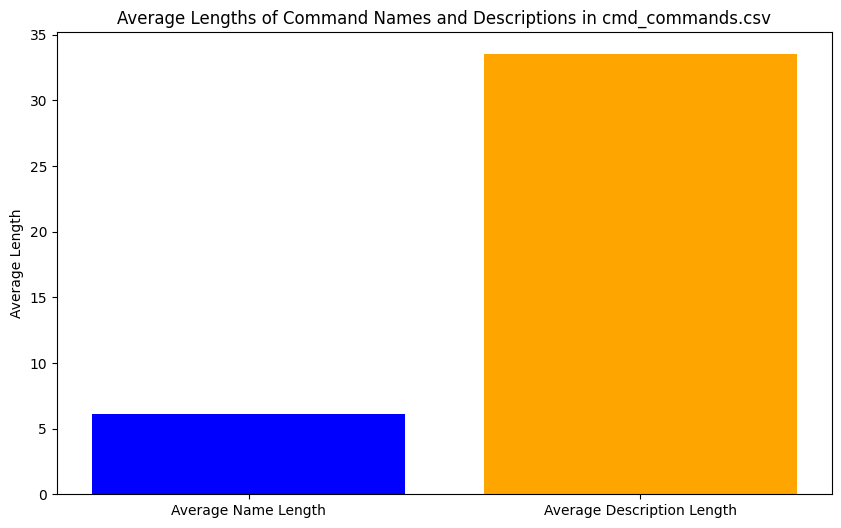

In [25]:
# Calculate average lengths of command names and descriptions in cmd_commands.csv
average_name_length_cmd = cmd_commands['name'].apply(len).mean()
average_description_length_cmd = cmd_commands['description'].apply(len).mean()

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(['Average Name Length', 'Average Description Length'], [average_name_length_cmd, average_description_length_cmd], color=['blue', 'orange'])
plt.title('Average Lengths of Command Names and Descriptions in cmd_commands.csv')
plt.ylabel('Average Length')
plt.show()
